In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
#print(pd.show_versions())
#print(sns.__version__)

#python 3.9.12.final.0
#pandas 1.4.2
#numpy 1.21.5
#matplotlib 3.5.1
#scipy 1.7.3
#seaborn 0.11.2

First, we make a comparison of the amount of phosphosites identified in domains, disordered regions and interaction interfaces as calculated prior in WP2. We plot these both as absolute numbers and as relative number in comparison to the total amount of identified phosphosites in a certain tissue. We notice that some phopshosites have been associated with both disorderedness and domains/families.

In [2]:
domains = pd.read_csv("2.2 number of sites in each category per tissue in domain", sep="\t", index_col=0)
domains.drop("Total", axis=1, inplace=True)
domains

,Tissue,Number of tissue-specific phosphosites,Number of tissue aspecific phosphosites,Number of pervasive phosphosites
0,Adipose tissue,0,83,140
1,B-cells,3,27,71
2,Blood,353,561,777
3,Bone,2,1,6
4,Brain,35,63,625
5,Breast,14,23,50
6,Cerebrospinal fluid,2,15,591
7,Cervix,1,6,7
8,Colon,966,847,464
9,Dental plaque,12,5,10


In [3]:
disordered = pd.read_csv("2.3 number of phosphosites in each category per tissue in disordered regions", sep="\t", index_col=0)
disordered

,Tissue,Number of tissue-specific phosphosites in a disordered region,Number of tissue aspecific phosphosites in a disordered region,Number of pervasive phosphosites in a disordered region
0,Adipose tissue,0,84,245
1,B-cells,14,69,202
2,Blood,1081,1925,2172
3,Bone,0,1,4
4,Brain,81,128,1615
5,Breast,7,6,34
6,Cerebrospinal fluid,5,17,1539
7,Cervix,5,4,7
8,Colon,4225,3281,1222
9,Dental plaque,6,4,11


In [4]:
interaction = pd.read_csv("2.3 number of phosphosites in each category per tissue in disordered regions associated with interaction interfaces", index_col=0)
interaction

,Tissue,Number of tissue-specific phosphosites having interaction interfaces,Number of tissue aspecific phosphosites having interaction interfaces,Number of pervasive phosphosites having interaction interfaces
0,Adipose tissue,0,49,128
1,B-cells,7,48,110
2,Blood,672,1127,1158
3,Bone,0,0,1
4,Brain,39,49,831
5,Breast,3,4,13
6,Cerebrospinal fluid,1,9,785
7,Cervix,2,1,3
8,Colon,2107,1776,667
9,Dental plaque,4,0,5


In [5]:
plot1 = pd.merge(domains, disordered, how="inner", on=["Tissue"])
plot1.rename({"Number of tissue-specific phosphosites": "Number of tissue-specific phosphosites in a domain",
             "Number of tissue aspecific phosphosites": "Number of tissue aspecific phopshosites in a domain",
             "Number of pervasive phosphosites": "Number of pervasive phosphosites in a domain"}, inplace=True, axis=1)
plot = pd.merge(plot1, interaction, how="inner", on=["Tissue"])
plot

,Tissue,Number of tissue-specific phosphosites in a domain,Number of tissue aspecific phopshosites in a domain,Number of pervasive phosphosites in a domain,Number of tissue-specific phosphosites in a disordered region,Number of tissue aspecific phosphosites in a disordered region,Number of pervasive phosphosites in a disordered region,Number of tissue-specific phosphosites having interaction interfaces,Number of tissue aspecific phosphosites having interaction interfaces,Number of pervasive phosphosites having interaction interfaces
0,Adipose tissue,0,83,140,0,84,245,0,49,128
1,B-cells,3,27,71,14,69,202,7,48,110
2,Blood,353,561,777,1081,1925,2172,672,1127,1158
3,Bone,2,1,6,0,1,4,0,0,1
4,Brain,35,63,625,81,128,1615,39,49,831
5,Breast,14,23,50,7,6,34,3,4,13
6,Cerebrospinal fluid,2,15,591,5,17,1539,1,9,785
7,Cervix,1,6,7,5,4,7,2,1,3
8,Colon,966,847,464,4225,3281,1222,2107,1776,667
9,Dental plaque,12,5,10,6,4,11,4,0,5


<Figure size 1080x432 with 0 Axes>

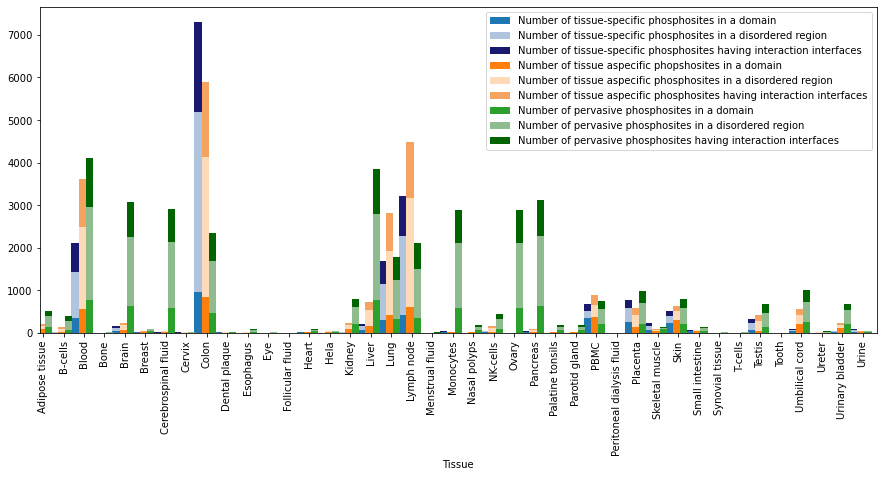

In [6]:
plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

plot[["Tissue", "Number of tissue-specific phosphosites in a domain", "Number of tissue-specific phosphosites in a disordered region",
     "Number of tissue-specific phosphosites having interaction interfaces"]].plot(kind="bar", stacked=True, x="Tissue",
                                                                                  color={"Number of tissue-specific phosphosites in a domain": "tab:blue",
                                                                                         "Number of tissue-specific phosphosites in a disordered region": "lightsteelblue",
                                                                                         "Number of tissue-specific phosphosites having interaction interfaces": "midnightblue"}, figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=1.75)
plot[["Tissue", "Number of tissue aspecific phopshosites in a domain", "Number of tissue aspecific phosphosites in a disordered region",
     "Number of tissue aspecific phosphosites having interaction interfaces"]].plot(kind="bar", stacked=True, x="Tissue",
                                                                                  color={"Number of tissue aspecific phopshosites in a domain": "tab:orange",
                                                                                         "Number of tissue aspecific phosphosites in a disordered region": "peachpuff",
                                                                                         "Number of tissue aspecific phosphosites having interaction interfaces": "sandybrown"},
                                                                                    figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=0.75)

plot[["Tissue", "Number of pervasive phosphosites in a domain", "Number of pervasive phosphosites in a disordered region",
     "Number of pervasive phosphosites having interaction interfaces"]].plot(kind="bar", stacked=True, x="Tissue",
                                                                                  color={"Number of pervasive phosphosites in a domain": "tab:green",
                                                                                         "Number of pervasive phosphosites in a disordered region": "darkseagreen",
                                                                                         "Number of pervasive phosphosites having interaction interfaces": "darkgreen"},
                                                                                    figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=-0.25)
#plt.savefig("Number Psites in domain and disordered per tissue per category.png", format="png", bbox_inches="tight")
plt.show()

In [7]:
data_cat = pd.read_csv("number of three categories per tissue_sites.tsv", sep="\t")
data_cat

,Tissue,number of tissue-specific sites,number of non tissue-specific sites,number of generally expressed sites,Total
0,Adipose tissue,0,221,390,611
1,B-cells,16,95,250,361
2,Blood,1642,2466,2961,7069
3,Bone,2,2,9,13
4,Brain,121,176,2307,2604
5,Breast,26,42,89,157
6,Cerebrospinal fluid,9,30,2203,2242
7,Cervix,7,8,13,28
8,Colon,5252,4089,1651,10992
9,Dental plaque,17,9,18,44


In [8]:
plot_ratio = pd.DataFrame({})
plot_ratio["Tissue"] = data_cat["Tissue"]
plot_ratio["Ratio of tissue-specific phosphosites in a domain"] = plot["Number of tissue-specific phosphosites in a domain"]*100/data_cat["number of tissue-specific sites"]
plot_ratio["Ratio of tissue-specific phosphosites in a disordered region"] = plot["Number of tissue-specific phosphosites in a disordered region"]*100/data_cat["number of tissue-specific sites"]
plot_ratio["Ratio of tissue-specific phosphosites having interaction interfaces"] = plot["Number of tissue-specific phosphosites having interaction interfaces"]*100/data_cat["number of tissue-specific sites"]
plot_ratio["Ratio of tissue aspecific phosphosites in a domain"] = plot["Number of tissue aspecific phopshosites in a domain"]*100/data_cat["number of non tissue-specific sites"]
plot_ratio["Ratio of tissue aspecific phosphosites in a disordered region"] = plot["Number of tissue aspecific phosphosites in a disordered region"]*100/data_cat["number of non tissue-specific sites"]
plot_ratio["Ratio of tissue aspecific phosphosites having interaction interfaces"] = plot["Number of tissue aspecific phosphosites having interaction interfaces"]*100/data_cat["number of non tissue-specific sites"]
plot_ratio["Ratio of pervasive phosphosites in a domain"] = plot["Number of pervasive phosphosites in a domain"]*100/data_cat["number of generally expressed sites"]
plot_ratio["Ratio of pervasive phosphosites in a disordered region"] = plot["Number of pervasive phosphosites in a disordered region"]*100/data_cat["number of generally expressed sites"]
plot_ratio["Ratio of pervasive phosphosites having interaction interfaces"] = plot["Number of pervasive phosphosites having interaction interfaces"]*100/data_cat["number of generally expressed sites"]

<Figure size 1080x432 with 0 Axes>

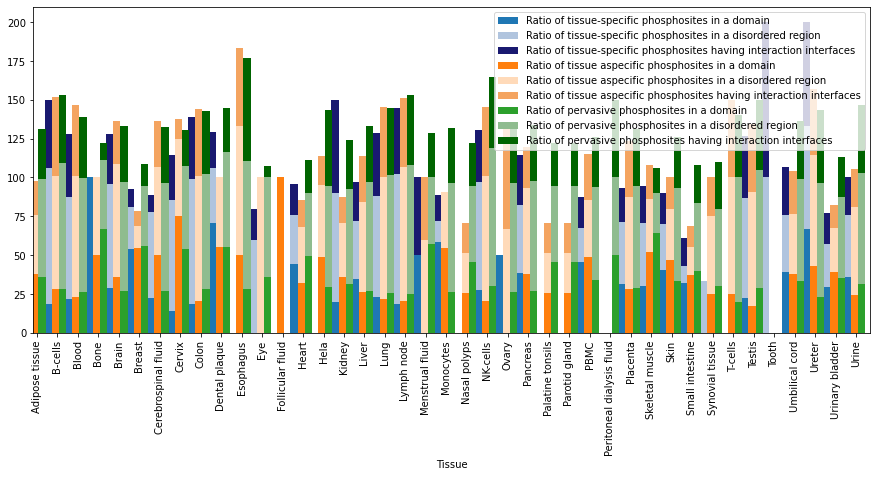

In [9]:
plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

plot_ratio[["Tissue", "Ratio of tissue-specific phosphosites in a domain", "Ratio of tissue-specific phosphosites in a disordered region",
     "Ratio of tissue-specific phosphosites having interaction interfaces"]].plot(kind="bar", stacked=True, x="Tissue",
                                                                                  color={"Ratio of tissue-specific phosphosites in a domain": "tab:blue",
                                                                                         "Ratio of tissue-specific phosphosites in a disordered region": "lightsteelblue",
                                                                                         "Ratio of tissue-specific phosphosites having interaction interfaces": "midnightblue"}, figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=1.75)
plot_ratio[["Tissue", "Ratio of tissue aspecific phosphosites in a domain", "Ratio of tissue aspecific phosphosites in a disordered region",
     "Ratio of tissue aspecific phosphosites having interaction interfaces"]].plot(kind="bar", stacked=True, x="Tissue",
                                                                                  color={"Ratio of tissue aspecific phosphosites in a domain": "tab:orange",
                                                                                         "Ratio of tissue aspecific phosphosites in a disordered region": "peachpuff",
                                                                                         "Ratio of tissue aspecific phosphosites having interaction interfaces": "sandybrown"},
                                                                                    figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=0.75)

plot_ratio[["Tissue", "Ratio of pervasive phosphosites in a domain", "Ratio of pervasive phosphosites in a disordered region",
     "Ratio of pervasive phosphosites having interaction interfaces"]].plot(kind="bar", stacked=True, x="Tissue",
                                                                                  color={"Ratio of pervasive phosphosites in a domain": "tab:green",
                                                                                         "Ratio of pervasive phosphosites in a disordered region": "darkseagreen",
                                                                                         "Ratio of pervasive phosphosites having interaction interfaces": "darkgreen"},
                                                                                    figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=-0.25)
#plt.axhline(y=100, c="black")
#plt.savefig("Ratio Psites in domain and disordered per tissue per category.png", format="png", bbox_inches="tight")
plt.show()

In [10]:
plot_ratio

,Tissue,Ratio of tissue-specific phosphosites in a domain,Ratio of tissue-specific phosphosites in a disordered region,Ratio of tissue-specific phosphosites having interaction interfaces,Ratio of tissue aspecific phosphosites in a domain,Ratio of tissue aspecific phosphosites in a disordered region,Ratio of tissue aspecific phosphosites having interaction interfaces,Ratio of pervasive phosphosites in a domain,Ratio of pervasive phosphosites in a disordered region,Ratio of pervasive phosphosites having interaction interfaces
0,Adipose tissue,NaN,NaN,NaN,37.556561,38.009050,22.171946,35.897436,62.820513,32.820513
1,B-cells,18.750000,87.500000,43.750000,28.421053,72.631579,50.526316,28.400000,80.800000,44.000000
2,Blood,21.498173,65.834348,40.925700,22.749392,78.061638,45.701541,26.241135,73.353597,39.108409
3,Bone,100.000000,0.000000,0.000000,50.000000,50.000000,0.000000,66.666667,44.444444,11.111111
4,Brain,28.925620,66.942149,32.231405,35.795455,72.727273,27.840909,27.091461,70.004335,36.020806
5,Breast,53.846154,26.923077,11.538462,54.761905,14.285714,9.523810,56.179775,38.202247,14.606742
6,Cerebrospinal fluid,22.222222,55.555556,11.111111,50.000000,56.666667,30.000000,26.827054,69.859283,35.633227
7,Cervix,14.285714,71.428571,28.571429,75.000000,50.000000,12.500000,53.846154,53.846154,23.076923
8,Colon,18.392993,80.445545,40.118050,20.714111,80.239667,43.433602,28.104179,74.015748,40.399758
9,Dental plaque,70.588235,35.294118,23.529412,55.555556,44.444444,0.000000,55.555556,61.111111,27.777778


<Figure size 1080x432 with 0 Axes>

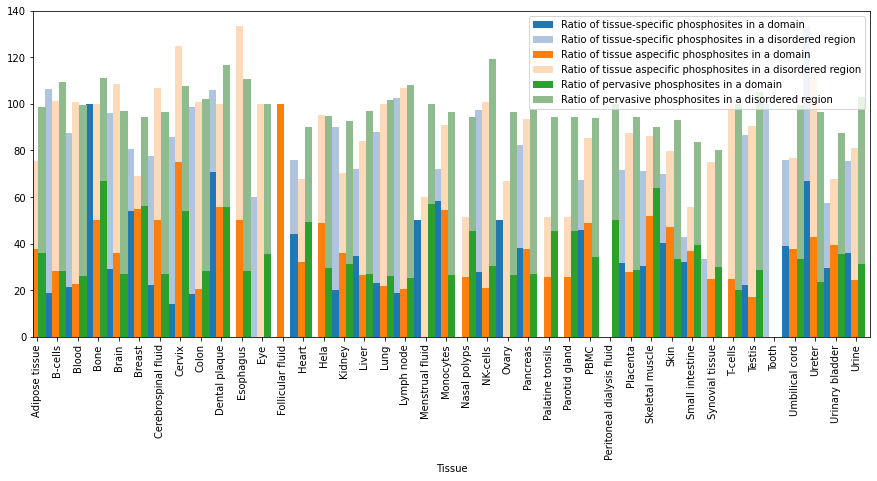

In [11]:
plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

plot_ratio[["Tissue", "Ratio of tissue-specific phosphosites in a domain", "Ratio of tissue-specific phosphosites in a disordered region",
     ]].plot(kind="bar", stacked=True, x="Tissue",
                                                                                  color={"Ratio of tissue-specific phosphosites in a domain": "tab:blue",
                                                                                         "Ratio of tissue-specific phosphosites in a disordered region": "lightsteelblue",
                                                                                         }, figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=1.75)
plot_ratio[["Tissue", "Ratio of tissue aspecific phosphosites in a domain", "Ratio of tissue aspecific phosphosites in a disordered region",
    ]].plot(kind="bar", stacked=True, x="Tissue",
                                                                                  color={"Ratio of tissue aspecific phosphosites in a domain": "tab:orange",
                                                                                         "Ratio of tissue aspecific phosphosites in a disordered region": "peachpuff",
                                                                                         },
                                                                                    figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=0.75)

plot_ratio[["Tissue", "Ratio of pervasive phosphosites in a domain", "Ratio of pervasive phosphosites in a disordered region",
     ]].plot(kind="bar", stacked=True, x="Tissue",
                                                                                  color={"Ratio of pervasive phosphosites in a domain": "tab:green",
                                                                                         "Ratio of pervasive phosphosites in a disordered region": "darkseagreen",
                                                                                         },
                                                                                    figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=-0.25)
#plt.savefig("Ratio Psites in domain and disordered per tissue per category.png", format="png", bbox_inches="tight")
plt.show()

Here, we combine the disordered regions and interaction interfaces under the label "disorder". As we want to avoid counting a phosphosite identified in a disordered region and an interaction interface twice, we recalculate the number of phosphosites identified in disordered regions and interaction interfaces combined.

In [12]:
proteins_mobi_sub_tot = pd.read_csv("Mobi_DB annotation_proteins", sep="\t")

In [13]:
t_spec_sites = pd.read_csv("1.2 tissue-specific sites.tsv", sep="\t")
non_t_spec_sites = pd.read_csv("1.2 non tissue-specific sites.tsv", sep="\t")
general_P_sites = pd.read_csv("1.2 general P sites.tsv", sep="\t")

In [14]:
print(t_spec_sites.shape[0])
print(t_spec_sites["ACC_ID"].nunique())
tspec_sites_mobi = pd.merge(t_spec_sites, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(tspec_sites_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(tspec_sites_mobi["ACC_ID"].nunique())
tspec_sites_mobi.head()

14019
4977
9312
3388


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A0A0U1RRK4,41,Testis,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-mobidb_lite,1..108,1.000,108,108
1,A0A0U1RRK4,41,Testis,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iupl,1..108,1.000,108,108
2,A0A0U1RRK4,41,Testis,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iups,"1..33,37..51,53..108",0.963,104,108
3,A0A1B0GTU1,491,Colon,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-mobidb_lite,"140..194,223..351,364..433,449..468,481..506,7...",0.486,391,805
4,A0A1B0GTU1,491,Colon,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-disorder-iupl,"100..200,216..216,220..433,437..437,443..511,5...",0.733,590,805


In [15]:
print(non_t_spec_sites.shape[0])
print(non_t_spec_sites["ACC_ID"].nunique())
taspec_sites_mobi = pd.merge(non_t_spec_sites, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(taspec_sites_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(taspec_sites_mobi["ACC_ID"].nunique())
taspec_sites_mobi.head()

6478
2718
4579
2003


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A0AVK6,102,"Blood,Blood,Colon,Colon,Colon,Colon,Colon",S,0,0,1,0,0,0,...,0,0,0,0,2,prediction-disorder-iupl,"1..31,33..62,68..70,77..85,94..96,99..110,112....",0.506,439,867
1,A0FGR8,738,"Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...",S,0,0,1,0,0,0,...,0,0,0,0,4,prediction-disorder-mobidb_lite,"1..103,660..754",0.215,198,921
2,A0FGR8,738,"Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...",S,0,0,1,0,0,0,...,0,0,0,0,4,prediction-disorder-iups,"1..103,457..459,551..556,559..567,573..573,603...",0.256,236,921
3,A0FGR8,738,"Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...",S,0,0,1,0,0,0,...,0,0,0,0,4,prediction-disorder-iupl,"1..34,37..45,47..104,519..521,552..572,576..57...",0.353,325,921
4,A0FGR8,739,"Liver,Blood,Blood,Colon,Lymph node,Lymph node,...",S,0,0,1,0,0,0,...,0,0,0,0,4,prediction-disorder-mobidb_lite,"1..103,660..754",0.215,198,921


In [16]:
print(general_P_sites.shape[0])
print(general_P_sites["ACC_ID"].nunique())
gen_sites_mobi = pd.merge(general_P_sites, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(gen_sites_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(gen_sites_mobi["ACC_ID"].nunique())
gen_sites_mobi.head()

3406
1368
2369
1004


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A0JNW5,1402,"Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...",S,0,0,1,0,1,0,...,0,0,0,0,8,prediction-disorder-mobidb_lite,"267..297,409..436,1066..1089,1164..1183,1392.....",0.085,125,1464
1,A0JNW5,1402,"Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...",S,0,0,1,0,1,0,...,0,0,0,0,8,prediction-disorder-iups,"1..6,93..108,110..110,267..292,295..297,407..4...",0.182,267,1464
2,A0JNW5,1402,"Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...",S,0,0,1,0,1,0,...,0,0,0,0,8,prediction-disorder-iupl,"93..109,265..294,297..297,340..348,409..434,59...",0.201,294,1464
3,A2RU30,454,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,0,0,7,prediction-disorder-iupl,"32..53,152..152,181..183,266..281,298..317,327...",0.405,211,521
4,A5PKW4,68,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",T,0,0,1,0,1,0,...,0,0,0,0,7,prediction-disorder-mobidb_lite,"25..98,113..230,246..402,430..536,976..1024",0.493,505,1024


In [17]:
mobi1 = pd.read_csv("mobidb_result_2022-03-03T09_47_39.301Z.tsv", sep="\t")
print(mobi1.shape[0])
mobi1.head()

1241631


,acc,feature,start..end,content_fraction,content_count,length
0,C0HLV8,prediction-disorder-th_50,"1..4,22..31",0.452,14,31
1,C0HLV8,prediction-low_complexity-merge,8..17,0.323,10,31
2,C0HLV8,prediction-disorder-iups,"1..4,25..31",0.355,11,31
3,C0HLV8,prediction-disorder-espN,"1..3,28..31",0.226,7,31
4,C0HLV8,prediction-disorder-espD,1..31,1.000,31,31


In [18]:
mobi = mobi1[(((mobi1["feature"].str.contains("curated"))|(mobi1["feature"].str.contains("disorder-mobidb_lite"))|
               (mobi1["feature"].str.contains("prediction-disorder-iups"))|(mobi1["feature"].str.contains("prediction-disorder-iupl"))|
           ((mobi1["feature"].str.contains("homology"))&(mobi1["feature"].str.contains("homology-domain")==False)))&
                                                               ((mobi1["feature"].str.contains("lip")==False)&
                                                               (mobi1["feature"].str.contains("binding_mode")==False)))]
mobi.rename(columns={"acc": "ACC_ID"}, inplace=True)
print(mobi.shape[0])
mobi.head()

183635


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_887/2598111647.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobi.rename(columns={"acc": "ACC_ID"}, inplace=True)


,ACC_ID,feature,start..end,content_fraction,content_count,length
2,C0HLV8,prediction-disorder-iups,"1..4,25..31",0.355,11,31
15,A0A7P0T821,prediction-disorder-iupl,"4..5,8..24,48..60",0.533,32,60
16,A0A7P0T821,prediction-disorder-iups,"1..10,14..24,52..60",0.500,30,60
28,A0A7P0TA09,prediction-disorder-iups,"1..5,254..256",0.031,8,256
37,A0A7P0T8G2,prediction-disorder-iupl,"1..4,6..17,24..29,43..44,48..49,52..52,67..68,...",0.391,109,279


In [19]:
mobi = mobi1[(((mobi1["feature"].str.contains("lip"))|
               (mobi1["feature"].str.contains("binding_mode"))))]
mobi.rename({"acc": "ACC_ID"}, inplace=True, axis=1)
print(mobi.shape[0])
mobi.head()

86622


/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_887/469402886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobi.rename({"acc": "ACC_ID"}, inplace=True, axis=1)


,ACC_ID,feature,start..end,content_fraction,content_count,length
24,A0A7P0T821,prediction-lip-anchor,"1..6,32..43,56..60",0.383,23,60
47,A0A7P0T8G2,prediction-lip-anchor,"13..13,26..30,60..68,116..125,146..153,171..17...",0.219,61,279
60,A0A7P0Z4R0,prediction-lip-anchor,"579..586,607..608",0.016,10,618
88,A0A7P0T9L5,prediction-lip-anchor,"12..18,339..342,405..407,476..478",0.028,17,610
105,A0A7P0TAB6,prediction-lip-anchor,"1..27,64..70,104..120",0.216,51,236


In [20]:
data_site= pd.read_csv("site_data", sep="\t")
data_site.head()

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
proteins_mobi = pd.merge(mobi, data_site[["ACC_ID", "UP_POS"]], on="ACC_ID", how="inner")
print(proteins_mobi.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(proteins_mobi["ACC_ID"].nunique())
proteins_mobi.head()

23437
5603


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,32
1,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,39
2,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,47
3,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,65
4,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,66


In [22]:
proteins_mobi1 = proteins_mobi["start..end"].str.split(",", expand=True)

In [23]:
proteins_mobi = pd.merge(proteins_mobi, proteins_mobi1, how="inner", left_index=True, right_index=True)
print(proteins_mobi.shape[0])
proteins_mobi.head()

90645


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS,0,1,2,...,492,493,494,495,496,497,498,499,500,501
0,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,32,25..28,46..53,95..106,...,None,None,None,None,None,None,None,None,None,None
1,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,39,25..28,46..53,95..106,...,None,None,None,None,None,None,None,None,None,None
2,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,47,25..28,46..53,95..106,...,None,None,None,None,None,None,None,None,None,None
3,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,65,25..28,46..53,95..106,...,None,None,None,None,None,None,None,None,None,None
4,P31946,prediction-lip-anchor,"25..28,46..53,95..106,121..130,173..183,218..225",0.215,53,246,66,25..28,46..53,95..106,...,None,None,None,None,None,None,None,None,None,None


In [24]:
proteins_mobi_sub_tot = pd.DataFrame({})
for i in range (502):
    proteins_mobi_sub = proteins_mobi.loc[proteins_mobi["UP_POS"].astype(float, copy=False).between(proteins_mobi[i].str.partition("..")[0].astype(float, copy=False), proteins_mobi[i].str.partition("..")[2].astype(float, copy=False))]
    proteins_mobi_sub_tot = proteins_mobi_sub_tot.append(proteins_mobi_sub, ignore_index=True)
    if i%10==0:
        print(i)

/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_887/2586549167.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  proteins_mobi_sub_tot = proteins_mobi_sub_tot.append(proteins_mobi_sub, ignore_index=True)


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500


In [25]:
for i in range(502):
    proteins_mobi_sub_tot.drop(i, axis=1, inplace=True)
print(proteins_mobi_sub_tot.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(proteins_mobi_sub_tot["ACC_ID"].nunique())
proteins_mobi_sub_tot.head()

8914
2799


,ACC_ID,feature,start..end,content_fraction,content_count,length,UP_POS
0,P27348,derived-binding_mode_disorder_to_disorder-mobi,232..245,0.057,14,245,232
1,P27348,derived-binding_mode_disorder_to_disorder-prio...,232..245,0.057,14,245,232
2,P22314,derived-binding_mode_disorder_to_disorder-mobi,"1..48,804..815,1058..1058",0.058,61,1058,13
3,P22314,derived-binding_mode_disorder_to_disorder-mobi,"1..48,804..815,1058..1058",0.058,61,1058,46
4,P22314,derived-binding_mode_disorder_to_disorder-prio...,"1..48,804..815,1058..1058",0.058,61,1058,13


In [26]:
print(t_spec_sites.shape[0])
print(t_spec_sites["ACC_ID"].nunique())
tspec_sites_mobi_ii = pd.merge(t_spec_sites, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(tspec_sites_mobi_ii.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(tspec_sites_mobi_ii["ACC_ID"].nunique())
tspec_sites_mobi_ii.head()

14019
4977
5093
2256


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A0A0U1RRK4,41,Testis,S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-lip-anchor,"1..1,12..108",0.907,98,108
1,A0A1B0GTU1,760,"Colon,Colon,Colon",S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-lip-anchor,"91..96,117..127,132..143,152..163,188..220,237...",0.463,373,805
2,A0A1B0GTU1,762,"Colon,Colon",S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-lip-anchor,"91..96,117..127,132..143,152..163,188..220,237...",0.463,373,805
3,A0A1B0GTU1,763,"Colon,Colon",T,0,0,0,0,0,0,...,0,0,0,0,1,prediction-lip-anchor,"91..96,117..127,132..143,152..163,188..220,237...",0.463,373,805
4,A0AVK6,68,"Colon,Colon,Colon",S,0,0,0,0,0,0,...,0,0,0,0,1,prediction-lip-anchor,"6..18,22..40,60..71,119..128,378..385,394..405...",0.300,260,867


In [27]:
print(non_t_spec_sites.shape[0])
print(non_t_spec_sites["ACC_ID"].nunique())
taspec_sites_mobi_ii = pd.merge(non_t_spec_sites, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(taspec_sites_mobi_ii.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(taspec_sites_mobi_ii["ACC_ID"].nunique())
taspec_sites_mobi_ii.head()

6478
2718
2567
1269


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A0AVK6,71,"Blood,Colon,Colon,Colon,Colon,Colon",S,0,0,1,0,0,0,...,0,0,0,0,2,prediction-lip-anchor,"6..18,22..40,60..71,119..128,378..385,394..405...",0.300,260,867
1,A0FGR8,738,"Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...",S,0,0,1,0,0,0,...,0,0,0,0,4,prediction-lip-anchor,"1..81,535..543,587..592,611..625,631..637,644....",0.258,238,921
2,A0FGR8,739,"Liver,Blood,Blood,Colon,Lymph node,Lymph node,...",S,0,0,1,0,0,0,...,0,0,0,0,4,prediction-lip-anchor,"1..81,535..543,587..592,611..625,631..637,644....",0.258,238,921
3,A0FGR8,758,"Liver,Liver,Blood,Testis",S,0,0,1,0,0,0,...,0,0,0,0,3,prediction-lip-anchor,"1..81,535..543,587..592,611..625,631..637,644....",0.258,238,921
4,A0FGR8,761,"Testis,Lymph node",S,0,0,0,0,0,0,...,0,0,0,0,2,prediction-lip-anchor,"1..81,535..543,587..592,611..625,631..637,644....",0.258,238,921


In [28]:
print(general_P_sites.shape[0])
print(general_P_sites["ACC_ID"].nunique())
gen_sites_mobi_ii = pd.merge(general_P_sites, proteins_mobi_sub_tot, how="inner", on=["ACC_ID", "UP_POS"])
print(gen_sites_mobi_ii.groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean().shape[0])
print(gen_sites_mobi_ii["ACC_ID"].nunique())
gen_sites_mobi_ii.head()

3406
1368
1254
589


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Umbilical cord,Ureter,Urinary bladder,Urine,Total,feature,start..end,content_fraction,content_count,length
0,A2RU30,454,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,0,0,7,prediction-lip-anchor,"64..65,82..84,233..239,285..295,312..337,356.....",0.186,97,521
1,A5PKW4,68,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",T,0,0,1,0,1,0,...,0,0,0,0,7,prediction-lip-anchor,"1..15,39..52,60..68,96..133,142..176,181..222,...",0.501,513,1024
2,A5PKW4,133,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,0,0,7,prediction-lip-anchor,"1..15,39..52,60..68,96..133,142..176,181..222,...",0.501,513,1024
3,A5PKW4,156,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,0,0,7,prediction-lip-anchor,"1..15,39..52,60..68,96..133,142..176,181..222,...",0.501,513,1024
4,A6NKT7,1275,"Umbilical cord,Blood,Colon,Adipose tissue, Umb...",S,1,0,1,0,0,0,...,1,0,0,0,7,prediction-lip-anchor,"32..36,320..321,718..720,764..764,788..794,809...",0.127,223,1758


In [29]:
tspec_sites_mobi_all = tspec_sites_mobi.append(tspec_sites_mobi_ii)
taspec_sites_mobi_all = taspec_sites_mobi.append(taspec_sites_mobi_ii)
gen_sites_mobi_all = gen_sites_mobi.append(gen_sites_mobi_ii)

/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_887/949454068.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tspec_sites_mobi_all = tspec_sites_mobi.append(tspec_sites_mobi_ii)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_887/949454068.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  taspec_sites_mobi_all = taspec_sites_mobi.append(taspec_sites_mobi_ii)
/var/folders/sq/z_sqn7bn61j9sqhwcb08v3tc0000gn/T/ipykernel_887/949454068.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gen_sites_mobi_all = gen_sites_mobi.append(gen_sites_mobi_ii)


In [30]:
print(tspec_sites_mobi_all.groupby(["ACC_ID", "UP_POS"]).agg({"feature":"first"}).shape[0])
print(taspec_sites_mobi_all.groupby(["ACC_ID", "UP_POS"]).agg({"feature":"first"}).shape[0])
print(gen_sites_mobi_all.groupby(["ACC_ID", "UP_POS"]).agg({"feature":"first"}).shape[0])

10135
4949
2513


In [31]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

<AxesSubplot:title={'center':'Number of phosphosites in a disordered region'}, xlabel='Tissue'>

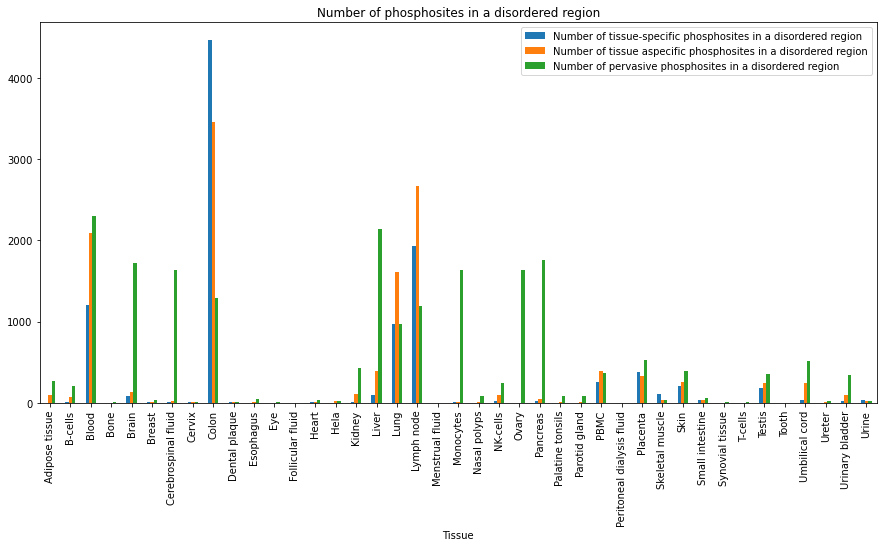

In [32]:
tspec_counts = []
taspec_counts = []
gen_counts = []
for tissue in list_tissues_STY:
    loc_tspec = tspec_sites_mobi_all.loc[tspec_sites_mobi_all[tissue]==1].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_taspec = taspec_sites_mobi_all.loc[taspec_sites_mobi_all[tissue]==1].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    loc_gen = gen_sites_mobi_all.loc[gen_sites_mobi_all[tissue]==1].groupby(["ACC_ID", "UP_POS"], as_index=False)["length"].mean()
    count_tspec = loc_tspec["ACC_ID"].count()
    count_taspec = loc_taspec["ACC_ID"].count()
    count_gen = loc_gen["ACC_ID"].count()
    tspec_counts.append(count_tspec)
    taspec_counts.append(count_taspec)
    gen_counts.append(count_gen)
distr_tissues = pd.DataFrame({"Tissue": list_tissues_STY, "Number of tissue-specific phosphosites in a disordered region": tspec_counts,
                             "Number of tissue aspecific phosphosites in a disordered region": taspec_counts,
                             "Number of pervasive phosphosites in a disordered region": gen_counts})
distr_tissues.plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of phosphosites in a disordered region")
#plt.savefig("WP2 MobiDB_tissues_phosphosites.png", format="png", bbox_inches="tight")

In [33]:
distr_tissues

,Tissue,Number of tissue-specific phosphosites in a disordered region,Number of tissue aspecific phosphosites in a disordered region,Number of pervasive phosphosites in a disordered region
0,Adipose tissue,0,99,265
1,B-cells,15,75,210
2,Blood,1205,2092,2302
3,Bone,0,1,4
4,Brain,84,130,1714
5,Breast,7,8,38
6,Cerebrospinal fluid,5,19,1637
7,Cervix,5,4,9
8,Colon,4459,3449,1286
9,Dental plaque,8,4,12


In [34]:
distr_tissues_dd = pd.merge(distr_tissues, domains, how="inner", on="Tissue")
distr_tissues_dd.rename({"Number of tissue-specific phosphosites": "Tissue-specific Psites in a domain",
                        "Number of tissue aspecific phosphosites": "Tissue aspecific Psites in a domain",
                        "Number of pervasive phosphosites": "Pervasive Psites in a domain"}, axis=1, inplace=True)
distr_tissues_dd.rename({"Number of tissue-specific phosphosites in a disordered region": "Tissue-specific Psites in a disordered region",
                        "Number of tissue aspecific phosphosites in a disordered region": "Tissue aspecific Psites in a disordered region",
                        "Number of pervasive phosphosites in a disordered region": "Pervasive Psites in a disordered region"}, axis=1, inplace=True)
distr_tissues_dd

,Tissue,Tissue-specific Psites in a disordered region,Tissue aspecific Psites in a disordered region,Pervasive Psites in a disordered region,Tissue-specific Psites in a domain,Tissue aspecific Psites in a domain,Pervasive Psites in a domain
0,Adipose tissue,0,99,265,0,83,140
1,B-cells,15,75,210,3,27,71
2,Blood,1205,2092,2302,353,561,777
3,Bone,0,1,4,2,1,6
4,Brain,84,130,1714,35,63,625
5,Breast,7,8,38,14,23,50
6,Cerebrospinal fluid,5,19,1637,2,15,591
7,Cervix,5,4,9,1,6,7
8,Colon,4459,3449,1286,966,847,464
9,Dental plaque,8,4,12,12,5,10


<Figure size 1080x432 with 0 Axes>

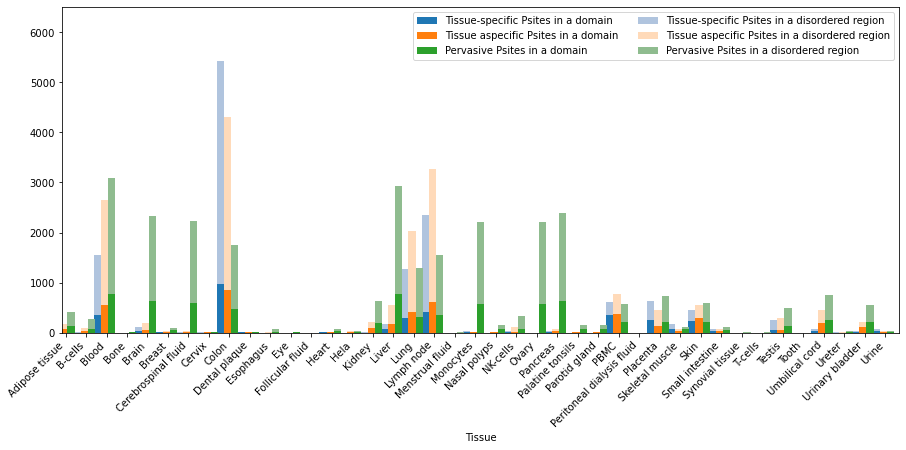

In [35]:
plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

distr_tissues_dd[["Tissue", "Tissue-specific Psites in a domain", "Tissue-specific Psites in a disordered region",
     ]].plot(kind="bar", stacked=True, x="Tissue", color={"Tissue-specific Psites in a domain": "tab:blue",
                                                                                         "Tissue-specific Psites in a disordered region": "lightsteelblue"
                                                                                         }, figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=1.75)
distr_tissues_dd[["Tissue", "Tissue aspecific Psites in a domain", "Tissue aspecific Psites in a disordered region",
     ]].plot(kind="bar", stacked=True, x="Tissue", color={"Tissue aspecific Psites in a domain": "tab:orange",
                                                                                         "Tissue aspecific Psites in a disordered region": "peachpuff"
                                                                                         },
                                                                                    figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=0.75)

distr_tissues_dd[["Tissue", "Pervasive Psites in a domain", "Pervasive Psites in a disordered region",
     ]].plot(kind="bar", stacked=True, x="Tissue", color={"Pervasive Psites in a domain": "tab:green",
                                                                                         "Pervasive Psites in a disordered region": "darkseagreen"
                                                                                         },
                                                                                    figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=-0.25)
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,4,1,3,5]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], ncol=2)
plt.xticks(rotation=45, ha="right")
plt.margins(0.2)
#plt.legend(ncol=3)
#plt.savefig("Number Psites in domain and disordered per tissue per category1.png", format="png", bbox_inches="tight")
plt.show()

In [36]:
plot_ratio = pd.DataFrame({})
plot_ratio["Tissue"] = data_cat["Tissue"]
plot_ratio["Percentage of tissue-specific phosphosites in a domain"] = distr_tissues_dd["Tissue-specific Psites in a domain"]*100/data_cat["number of tissue-specific sites"]
plot_ratio["Percentage of tissue-specific phosphosites in a disordered region"] = distr_tissues_dd["Tissue-specific Psites in a disordered region"]*100/data_cat["number of tissue-specific sites"]
plot_ratio["Percentage of tissue aspecific phosphosites in a domain"] = distr_tissues_dd["Tissue aspecific Psites in a domain"]*100/data_cat["number of non tissue-specific sites"]
plot_ratio["Percentage of tissue aspecific phosphosites in a disordered region"] = distr_tissues_dd["Tissue aspecific Psites in a disordered region"]*100/data_cat["number of non tissue-specific sites"]
plot_ratio["Percentage of pervasive phosphosites in a domain"] = distr_tissues_dd["Pervasive Psites in a domain"]*100/data_cat["number of generally expressed sites"]
plot_ratio["Percentage of pervasive phosphosites in a disordered region"] = distr_tissues_dd["Pervasive Psites in a disordered region"]*100/data_cat["number of generally expressed sites"]

In [37]:
plot_ratio

,Tissue,Percentage of tissue-specific phosphosites in a domain,Percentage of tissue-specific phosphosites in a disordered region,Percentage of tissue aspecific phosphosites in a domain,Percentage of tissue aspecific phosphosites in a disordered region,Percentage of pervasive phosphosites in a domain,Percentage of pervasive phosphosites in a disordered region
0,Adipose tissue,NaN,NaN,37.556561,44.796380,35.897436,67.948718
1,B-cells,18.750000,93.750000,28.421053,78.947368,28.400000,84.000000
2,Blood,21.498173,73.386114,22.749392,84.833739,26.241135,77.744005
3,Bone,100.000000,0.000000,50.000000,50.000000,66.666667,44.444444
4,Brain,28.925620,69.421488,35.795455,73.863636,27.091461,74.295622
5,Breast,53.846154,26.923077,54.761905,19.047619,56.179775,42.696629
6,Cerebrospinal fluid,22.222222,55.555556,50.000000,63.333333,26.827054,74.307762
7,Cervix,14.285714,71.428571,75.000000,50.000000,53.846154,69.230769
8,Colon,18.392993,84.900990,20.714111,84.348251,28.104179,77.892187
9,Dental plaque,70.588235,47.058824,55.555556,44.444444,55.555556,66.666667


<Figure size 1080x432 with 0 Axes>

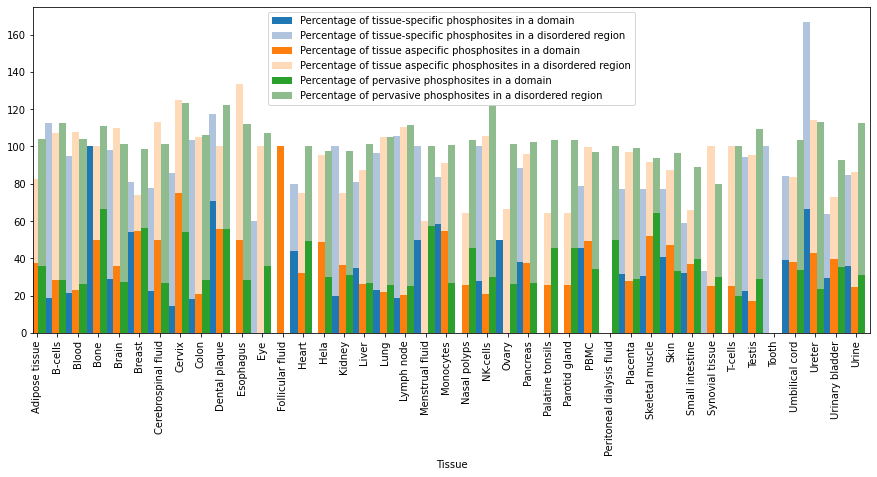

In [38]:
plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

plot_ratio[["Tissue", "Percentage of tissue-specific phosphosites in a domain", "Percentage of tissue-specific phosphosites in a disordered region",
     ]].plot(kind="bar", stacked=True, x="Tissue",
                                                                                  color={"Percentage of tissue-specific phosphosites in a domain": "tab:blue",
                                                                                         "Percentage of tissue-specific phosphosites in a disordered region": "lightsteelblue",
                                                                                         }, figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=1.75)
plot_ratio[["Tissue", "Percentage of tissue aspecific phosphosites in a domain", "Percentage of tissue aspecific phosphosites in a disordered region",
    ]].plot(kind="bar", stacked=True, x="Tissue",
                                                                                  color={"Percentage of tissue aspecific phosphosites in a domain": "tab:orange",
                                                                                         "Percentage of tissue aspecific phosphosites in a disordered region": "peachpuff",
                                                                                         },
                                                                                    figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=0.75)

plot_ratio[["Tissue", "Percentage of pervasive phosphosites in a domain", "Percentage of pervasive phosphosites in a disordered region",
     ]].plot(kind="bar", stacked=True, x="Tissue",
                                                                                  color={"Percentage of pervasive phosphosites in a domain": "tab:green",
                                                                                         "Percentage of pervasive phosphosites in a disordered region": "darkseagreen",
                                                                                         },
                                                                                    figsize=(15,6),
                                                                                  ax=ax, width=0.35, position=-0.25)
#plt.savefig("Ratio Psites in domain and disordered per tissue per category.png", format="png", bbox_inches="tight")
plt.show()

We now compare the distributions of the ratio of phosphosites in domains/families in comparison to the ratio phosphosites in disordered regions, per category. Ratios were calculated per tissue, as a percentage of sites in domain/disordered in comparison to the total amount of phosphosites per tissue.

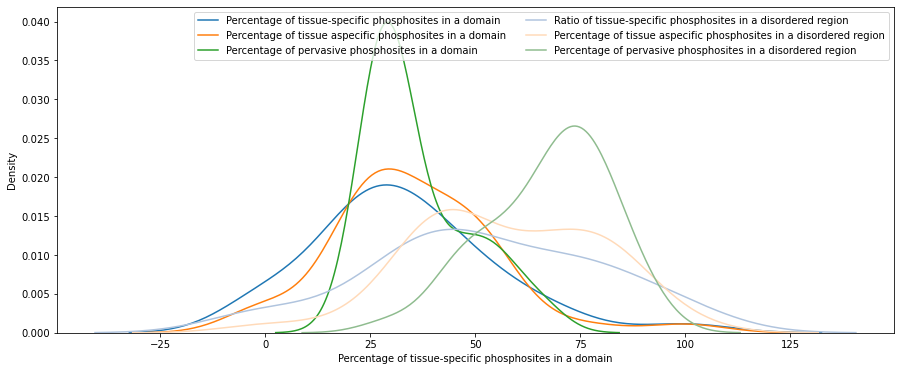

In [40]:
plt.figure(figsize=(15,6))

sns.kdeplot(x=plot_ratio["Percentage of tissue-specific phosphosites in a domain"], color="tab:blue")
sns.kdeplot(x=plot_ratio["Percentage of tissue aspecific phosphosites in a domain"], color="tab:orange")
sns.kdeplot(x=plot_ratio["Percentage of pervasive phosphosites in a domain"], color="tab:green")
sns.kdeplot(x=plot_ratio["Percentage of tissue-specific phosphosites in a disordered region"], color="lightsteelblue")
sns.kdeplot(x=plot_ratio["Percentage of tissue aspecific phosphosites in a disordered region"], color="peachpuff")
sns.kdeplot(x=plot_ratio["Percentage of pervasive phosphosites in a disordered region"], color="darkseagreen")

plt.legend(labels=["Percentage of tissue-specific phosphosites in a domain", "Percentage of tissue aspecific phosphosites in a domain",
                   "Percentage of pervasive phosphosites in a domain", "Ratio of tissue-specific phosphosites in a disordered region",
                  "Percentage of tissue aspecific phosphosites in a disordered region",
                  "Percentage of pervasive phosphosites in a disordered region"], ncol=2)

#plt.savefig("Distribution of the percentage Psites in domain or disorder.png", format="png", bbox_inches="tight")
plt.show()

We now investigate the overlap between the P-sites in disordered regions and the ones in domains/families.

In [41]:
tspec_domain = pd.read_csv("tissue-specific P-sites in domains and families", sep="\t")
tspec_domain

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Ureter,Urinary bladder,Urine,Total,hmm start,hmm end,hmm name,type,clan,E-value
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,0,0,0,1,1,91,V-set,Domain,CL0011,1.100000e-13
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,0,0,0,1,1,92,V-set,Domain,CL0011,2.200000e-13
2,A0A0B4J2D9,52,"Blood,Blood,Blood",S,0,0,1,0,0,0,...,0,0,0,1,1,92,V-set,Domain,CL0011,7.100000e-13
3,A0A0C4DH24,75,Skeletal muscle,S,0,0,0,0,0,0,...,0,0,0,1,2,91,V-set,Domain,CL0011,1.200000e-11
4,A0A0C4DH67,50,Blood,S,0,0,1,0,0,0,...,0,0,0,1,1,91,V-set,Domain,CL0011,1.100000e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,Q9Y6R7,224,Small intestine,S,0,0,0,0,0,0,...,0,0,0,1,3,295,IgGFc_binding,Family,No_clan,4.700000e-54
4763,Q9Y6X8,37,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",T,0,0,0,0,0,0,...,0,0,0,1,8,56,Homeodomain,Domain,CL0123,5.200000e-03
4764,Q9Y6X8,37,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",T,0,0,0,0,0,0,...,0,0,0,1,8,52,Homeodomain,Domain,CL0123,8.300000e-03
4765,Q9Y6X8,37,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",T,0,0,0,0,0,0,...,0,0,0,1,8,53,Homeodomain,Domain,CL0123,6.000000e-02


In [42]:
taspec_domain = pd.read_csv("tissue aspecific P-sites in domains and families", sep="\t")
taspec_domain

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Ureter,Urinary bladder,Urine,Total,hmm start,hmm end,hmm name,type,clan,E-value
0,A0M8Q6,31,"Nasal polyps, Palatine tonsils, Parotid gland,...",S,0,0,0,0,0,0,...,0,0,0,3,1,85,C1-set,Domain,CL0011,2.100000e-27
1,A1L390,76,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,0,0,0,2,1,183,RhoGEF,Domain,No_clan,7.400000e-41
2,A1L390,76,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,0,0,0,2,20,104,PH,Domain,CL0266,6.400000e-04
3,A2RRP1,473,"Blood,Blood,Blood,Blood,Blood,Placenta,Placent...",S,0,0,1,0,0,0,...,0,0,0,3,1,737,Sec39,Family,No_clan,4.200000e-24
4,A3KN83,214,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,0,0,0,2,1,271,Helicase_C_4,Domain,CL0023,2.200000e-119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,Q9Y6M7,84,"Blood,Blood,Colon,Colon,Colon,Colon,Colon",S,0,0,1,0,0,0,...,0,0,0,2,1,119,Band_3_cyto,Domain,CL0340,1.900000e-35
2365,Q9Y6M7,233,"Colon,Lymph node,Lymph node,Lymph node,Lymph n...",S,0,0,0,0,0,0,...,0,0,0,2,1,498,HCO3_cotransp,Family,CL0062,1.100000e-229
2366,Q9Y6M7,233,"Colon,Lymph node,Lymph node,Lymph node,Lymph n...",S,0,0,0,0,0,0,...,0,0,0,2,116,261,Band_3_cyto,Domain,CL0340,1.400000e-61
2367,Q9Y6R1,245,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,1,0,...,0,0,0,2,1,498,HCO3_cotransp,Family,CL0062,6.100000e-224


In [43]:
gen_domain = pd.read_csv("Pervasive P-sites in domains and families", sep="\t")
gen_domain

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Ureter,Urinary bladder,Urine,Total,hmm start,hmm end,hmm name,type,clan,E-value
0,A0A0C4DH39,51,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,0,7,9,91,V-set,Domain,CL0011,7.200000e-07
1,A5PKW4,68,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",T,0,0,1,0,1,0,...,0,0,0,7,32,182,Sec7,Domain,No_clan,1.800000e-38
2,A5PKW4,68,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",T,0,0,1,0,1,0,...,0,0,0,7,1,101,PH,Domain,CL0266,2.600000e-08
3,A5PKW4,86,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,0,7,32,182,Sec7,Domain,No_clan,1.800000e-38
4,A5PKW4,86,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,0,7,1,101,PH,Domain,CL0266,2.600000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,Q9Y6R1,256,"Liver,Kidney,Colon,Colon,Colon,Colon,Colon,Col...",S,0,0,1,0,1,0,...,0,0,0,9,2,261,Band_3_cyto,Domain,CL0340,6.400000e-97
1240,Q9Y6R1,257,"Liver,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,1,0,1,0,...,0,0,0,8,1,498,HCO3_cotransp,Family,CL0062,6.100000e-224
1241,Q9Y6R1,257,"Liver,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,1,0,1,0,...,0,0,0,8,2,261,Band_3_cyto,Domain,CL0340,6.400000e-97
1242,Q9Y6T7,122,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",T,0,0,1,0,1,0,...,0,0,0,7,2,160,DAGK_acc,Family,CL0701,1.200000e-53


In [44]:
tspec_common = pd.merge(tspec_domain, tspec_sites_mobi, how="inner", on=["ACC_ID", "UP_POS"])
tspec_common[["ACC_ID", "UP_POS", "hmm start", "hmm end", "hmm name", "type", "start..end", "feature"]]

,ACC_ID,UP_POS,hmm start,hmm end,hmm name,type,start..end,feature
0,A0M8Q6,10,1,85,C1-set,Domain,"2..15,44..45,48..60,62..62,64..67,84..86,91..9...",prediction-disorder-iupl
1,A0M8Q6,10,1,85,C1-set,Domain,"1..11,53..56,64..64,99..106",prediction-disorder-iups
2,A1L170,18,1,273,DUF4628,Family,"1..47,111..135,147..230,242..272",prediction-disorder-mobidb_lite
3,A1L170,18,1,273,DUF4628,Family,"7..7,10..10,13..50,56..138,141..227,229..230,2...",prediction-disorder-iupl
4,A1L170,222,1,273,DUF4628,Family,"1..47,111..135,147..230,242..272",prediction-disorder-mobidb_lite
...,...,...,...,...,...,...,...,...
6666,Q9Y6X8,37,8,52,Homeodomain,Domain,"1..51,53..53,59..64,155..155,163..215,404..404...",prediction-disorder-iups
6667,Q9Y6X8,37,8,53,Homeodomain,Domain,"1..51,53..68,91..98,124..131,136..139,143..143...",prediction-disorder-iupl
6668,Q9Y6X8,37,8,53,Homeodomain,Domain,"1..51,53..53,59..64,155..155,163..215,404..404...",prediction-disorder-iups
6669,Q9Y6X8,37,2,52,zf_C2H2_ZHX,Domain,"1..51,53..68,91..98,124..131,136..139,143..143...",prediction-disorder-iupl


In [45]:
tspec_common["feature"].value_counts()

prediction-disorder-iupl                    2061
prediction-disorder-iups                    1975
prediction-disorder-mobidb_lite             1647
curated-disorder-priority                    168
curated-disorder-merge                       168
curated-conformational_diversity-merge       109
curated-conformational_diversity-codnas      109
curated-disorder-disprot                     109
curated-disorder-ideal                        88
homology-disorder-merge                       41
homology-disorder-priority                    34
homology-conformational_diversity-codnas      31
homology-conformational_diversity-merge       31
homology-disorder-disprot                     29
curated-phase_separation-phasepro             22
curated-phase_separation-merge                22
homology-disorder-ideal                       13
curated-disorder-uniprot                       6
homology-phase_separation-phasepro             4
homology-phase_separation-merge                4
Name: feature, dtype

In [46]:
tspec_common["hmm name"].value_counts()

Pkinase            266
Filamin            203
RRM_1               92
Helicase_C          86
DEAD                81
                  ... 
TLD                  1
RHD_dimer            1
ATP-gua_PtransN      1
MBOAT                1
Rho_GDI              1
Name: hmm name, Length: 896, dtype: int64

In [47]:
tspec_common[tspec_common["type"]=="Disordered"]

,ACC_ID,UP_POS,tissue_x,modres_x,Adipose tissue_x,B-cells_x,Blood_x,Bone_x,Brain_x,Breast_x,...,Umbilical cord_y,Ureter_y,Urinary bladder_y,Urine_y,Total_y,feature,start..end,content_fraction,content_count,length
